In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/archive.zip -d /content/drive/MyDrive

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import random

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
import cv2

In [3]:
imgs=[]

p1='TB_Chest_Radiography_Database/Normal'
l1=os.listdir('TB_Chest_Radiography_Database/Normal')

p2='TB_Chest_Radiography_Database/Tuberculosis'
l2=os.listdir('TB_Chest_Radiography_Database/Tuberculosis')

print('Number of Normal Images:',len(l1))
print('Number of Tuberculosis Images:',len(l2))

# for i in l1:
#     imgs.append((plt.imread(p1+'/'+i),0))

i1_=list(range(len(l1)))
random.shuffle(i1_)

no=len(l2)
# no=len(l1)

for i in i1_[:no]:
    m1=plt.imread(p1+'/'+l1[i])
    if len(m1.shape)==3:
        imgs.append((np.mean(m1,axis=2),0))
    else:
        imgs.append((m1,0))
    
for i in l2:
    m2=plt.imread(p2+'/'+i)
    if len(m2.shape)==3:
        imgs.append((np.mean(m2,axis=2),1))
    else:
        imgs.append((m2,1))

Number of Normal Images: 3500
Number of Tuberculosis Images: 700


In [4]:
print('Total Images taken to work with:',len(imgs))

i_=list(range(len(imgs)))
random.shuffle(i_) 

Total Images taken to work with: 1400


In [5]:
x=[]
y=[]
for i in i_:
    x.append(cv2.resize(imgs[i][0], (256, 256)))
    y.append(imgs[i][1])

In [6]:
xtr, xte, ytr, yte =train_test_split(x, y, test_size=0.33)
xtr = np.array(xtr)
xte = np.array(xte)
Xtr = xtr.reshape(xtr.shape[0],256,256,1)
Xte = xte.reshape(xte.shape[0],256,256,1)

In [7]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

2022-12-07 18:59:03.844056: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-07 18:59:04.014039: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-12-07 18:59:04.042260: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/shreeparna/Desktop/notebook/jupyterenv/lib/python3.10/site-packages/cv2/../..

In [13]:
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(256, 256,1)),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(1024, activation='relu', kernel_initializer='he_uniform'),
    Dense(256, activation='relu', kernel_initializer='he_uniform'),
    Dense(128, activation='relu', kernel_initializer='he_uniform'),
    Dense(1, activation='sigmoid')
])
cnn_model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'] )

In [14]:
cnn_model.summary()
history = cnn_model.fit(Xtr, np.array(ytr), epochs=20, validation_data=(Xte, np.array(yte)))
prediction= cnn_model.predict(Xte)
prediction= (prediction > 0.5)
print(classification_report(yte,prediction))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 256, 256, 32)      320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 128, 128, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 32, 32, 64)      

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


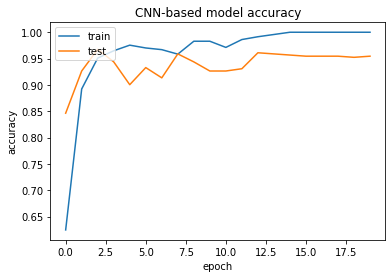

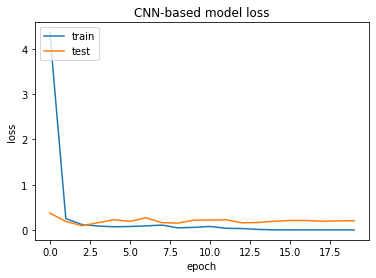

In [18]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('CNN-based model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('CNN-based model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()